In [11]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr

from mapper_functions import plot_global
from mapper_functions import plot_na

from my_functions import read_obsfcstana_pentads


In [ ]:

fname = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/ASCAT_M36.ldas_log.20200601_0000z.txt'

In [ ]:
# Open the file for reading
with open(fname, 'r') as f:
    # Initialize an empty list to store the extracted data
    data = []
    # Loop through each line in the file
    for line in f:
        # Check if the line starts with "Found!"
        if line.startswith('Found!'):
            # Extract the numbers in the remaining columns
            columns = line.strip().split()[1:]
            numbers = [float(col) for col in columns]
            # Append the numbers to the data list
            data.append(numbers)

In [ ]:
# Convert the data list to a NumPy array
data_array = np.array(data)


In [ ]:
# Split the 2D array into 10 separate arrays
i = data_array[:, 0]
pp = data_array[:, 1]
j_ind = data_array[:, 2]
i_ind = data_array[:, 3]
tmp_obs = data_array[:, 4]
sclprm_mean_obs = data_array[:, 5]
sclprm_std_mod = data_array[:, 6]
sclprm_std_obs = data_array[:, 7]
sclprm_mean_mod = data_array[:, 8]
tmp_std_obs = data_array[:, 9]

In [ ]:
# Create a scatter plot of tmp_obs against sclprm_mean_mod
plt.scatter(sclprm_mean_mod, tmp_obs, s=5)

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')

# Add a dashed line for the 1:1 line
x = np.linspace(0, 1, 100)
plt.plot(x, x, '--', color='gray')

# Display the plot
plt.show()


In [ ]:
# Calculate tmpreal by dividing sclprm_std_mod by sclprm_std_obs
tmpreal = sclprm_std_mod / sclprm_std_obs

# Calculate tmp_obs2 using the formula sclprm_mean_mod + tmpreal*(tmp_obs-sclprm_mean_obs)
tmp_obs2 = sclprm_mean_mod + tmpreal * (tmp_obs - sclprm_mean_obs)

In [ ]:
# Create a scatter plot of tmp_obs against sclprm_mean_mod
plt.scatter(sclprm_mean_mod, tmp_obs, s=10)

# Create a scatter plot of tmp_obs2 against sclprm_mean_mod in a different color
plt.scatter(sclprm_mean_mod, tmp_obs2, s=10, c='r')

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')

# Add a dashed line for the 1:1 line
x = np.linspace(0, 1, 100)
plt.plot(x, x, '--', color='gray')

# Display the plot
plt.show()



In [ ]:
# Create a line plot of sclprm_mean_mod against tmp_obs
plt.plot(tmp_obs, label='tmp_obs')

# Create a line plot of sclprm_mean_mod against tmp_obs2 in a different color
plt.plot(tmp_obs2, label='tmp_obs2')

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.ylim([0, 1])

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [3]:
# Read ObsFcstAna files
path = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M06'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna.201506'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar, pentad2 = read_obsfcstana_pentads(path, file_name_start, printflag)

Total number of obs =  1629620


In [4]:
# Open the netCDF file using xarray
ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')

sclprm_mean_obs_3D = ds['o_mean'].values
sclprm_mean_mod_3D = ds['m_mean'].values
sclprm_std_obs_3D = ds['o_std'].values
sclprm_std_mod_3D = ds['m_std'].values

In [5]:
date_time[9]['pentad'][0]

# for dt in date_time:
#     pentad = dt['pentad'][0]
#     print(pentad)

35

In [6]:
#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

n_obs = len(obs_obs)
tmp_obs = obs_obs.copy()
tmp_std_obs = obs_obsvar.copy()

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

In [7]:


for i in range(len(obs_obs)):
    this_lon = obs_lon[i]   
    this_lat = obs_lat[i]  
    i_ind = int((this_lon - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
    j_ind = int((this_lat - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran
    
    # sclprm_mean_obs = ds['o_mean'].sel(pentad = pentad2[i]).values
    # sclprm_mean_mod = ds['m_mean'].sel(pentad = pentad2[i]).values
    # sclprm_std_obs = ds['o_std'].sel(pentad = pentad2[i]).values
    # sclprm_std_mod = ds['m_std'].sel(pentad = pentad2[i]).values

    sclprm_mean_obs = sclprm_mean_obs_3D[int(pentad2[i]), :, :]
    sclprm_mean_mod = sclprm_mean_mod_3D[int(pentad2[i]), :, :]
    sclprm_std_obs = sclprm_std_obs_3D[int(pentad2[i]), :, :]
    sclprm_std_mod = sclprm_std_mod_3D[int(pentad2[i]), :, :]

    if (sclprm_mean_obs[i_ind, j_ind] > 0 and sclprm_mean_mod[i_ind, j_ind] > 0 and
    sclprm_std_obs[i_ind, j_ind] >= 0 and sclprm_std_mod[i_ind, j_ind] >= 0):
        # Scale via standard normal deviates
        tmpreal = sclprm_std_mod[i_ind, j_ind] / sclprm_std_obs[i_ind, j_ind]
        tmp_obs[i] = sclprm_mean_mod[i_ind, j_ind] + tmpreal * (tmp_obs[i] - sclprm_mean_obs[i_ind, j_ind])
        # Scale observation error std
        tmp_std_obs[i] = tmpreal * tmp_std_obs[i]

        i_out[i] = i_ind
        j_out[i] = j_ind
        
    else:
        tmp_obs[i] = -9999.9


idx = np.where(tmp_obs >= -9999)


In [ ]:
num_values = len(idx[0])
print("Number of values that meet the criteria: ", num_values)

# Generate data
data1 = tmp_obs[idx]
data2 = obs_obs[idx]

In [ ]:

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Scaled')

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Count')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_cnt.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()


In [ ]:
import numpy as np

# Example input data
i_indices = np.array([1, 1, 2, 3, 3, 3])
j_indices = np.array([2, 2, 3, 1, 1, 2])
observations = np.array([10, 20, 30, 40, 50, 60])

# Get unique pairs of (i, j) indices
unique_pairs, indices = np.unique(np.column_stack((i_indices, j_indices)), axis=0, return_inverse=True)

# Group observations by (i, j) pairs
grouped_observations = np.zeros(len(unique_pairs))
for i in range(len(unique_pairs)):
    mask = (indices == i)
    observations_for_pair = observations[mask]
    grouped_observations[i] = np.sum(observations_for_pair)

# Print the result
print("Grouped observations:")
print(grouped_observations)

In [ ]:
observations_by_pair = {}
for i, j, obs in zip(i_indices, j_indices, observations):
    pair = (i, j)
    if pair in observations_by_pair:
        observations_by_pair[pair].append(obs)
    else:
        observations_by_pair[pair] = [obs]

observations_by_pair[(3, 1)]

Pair (832, 251) has the most observations (50.0).
Pair (823, 278) has 45.0 observations.
Pair (832, 252) has 46.0 observations.
Pair (466, 234) has 46.0 observations.
Pair (472, 218) has 45.0 observations.
Pair (1180, 272) has 47.0 observations.
Pair (469, 233) has 47.0 observations.
Pair (835, 251) has 48.0 observations.
Pair (1180, 271) has 48.0 observations.
Pair (469, 234) has 49.0 observations.
Pair (832, 251) has 50.0 observations.


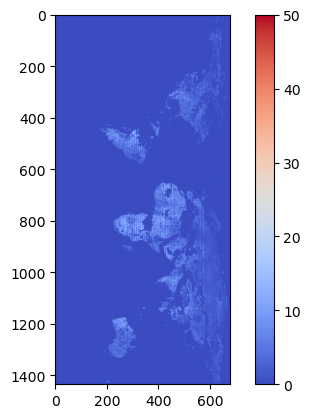

Indices of observations for pair (832, 251): [101968, 106034, 119149, 123205, 127421, 156056, 178410, 186108, 189785, 193827, 291627, 317292, 340915, 360926, 370809, 383881, 521394, 530958, 539556, 542738, 663680, 727883, 733027, 735690, 768696, 793808, 814368, 888820, 949433, 951984, 962988, 999049, 1004365, 1023898, 1029341, 1060663, 1227747, 1297090, 1369965, 1380638, 1425069, 1437429, 1445905, 1546259, 1550539, 1553521, 1568657, 1582380, 1613355, 1627974]
[0.12066666 0.07       0.31599998 0.36399999 0.223      0.13
 0.3075     0.1455     0.14300001 0.18000001 0.15700001 0.2175
 0.241      0.30250001 0.07433333 0.18866666 0.19400001 0.24199998
 0.21233332 0.19499999 0.14649999 0.149      0.2245     0.15799999
 0.352      0.226      0.14399999 0.068      0.19049999 0.105
 0.37799999 0.14649999 0.14300001 0.133      0.14300001 0.11
 0.19600001 0.24700001 0.25266668 0.0885     0.1565     0.145
 0.38150001 0.19150001 0.2105     0.22233336 0.139      0.175
 0.2965     0.155     ]


In [8]:
indices_i = i_out.astype(int)
indices_j = j_out.astype(int)
observations = obs_obs

pair_count = np.zeros((indices_i.max()+1, indices_j.max()+1))

observations_by_pair = {}

for i, j, obs in zip(indices_i, indices_j, observations):
    if i != 0 or j != 0:
        if (i, j) in observations_by_pair:
            observations_by_pair[(i, j)].append(obs)
        else:
            observations_by_pair[(i, j)] = [obs]

        pair_count[int(i), int(j)] += 1

# Print counts for each pair
#for pair, count in np.ndenumerate(pair_count):
#    print(f"Pair {pair}: {count} observations")    

# Find pair with the most observations
max_pair = np.unravel_index(np.argmax(pair_count), pair_count.shape)
print(f"Pair {max_pair} has the most observations ({pair_count[max_pair]}).")

# Get indices of the top 10 pairs with the most counts
n_top_pairs = 10
flat_counts = pair_count.flatten()
top_indices = np.argpartition(flat_counts, -n_top_pairs)[-n_top_pairs:]
top_pairs = np.unravel_index(top_indices, pair_count.shape)

# Print the top 10 pairs and their counts
for i, j in zip(top_pairs[0], top_pairs[1]):
    count = pair_count[i, j]
    print(f"Pair ({i}, {j}) has {count} observations.")


plt.imshow(pair_count, cmap='coolwarm')
plt.colorbar()
plt.show()

# Find indices of observations for max_pair
max_pair_indices = []
for idx, (i, j) in enumerate(zip(indices_i, indices_j)):
    if i == max_pair[0] and j == max_pair[1]:
        max_pair_indices.append(idx)

# Print indices of observations for max_pair
print(f"Indices of observations for pair {max_pair}: {max_pair_indices}")

print(observations[max_pair_indices])


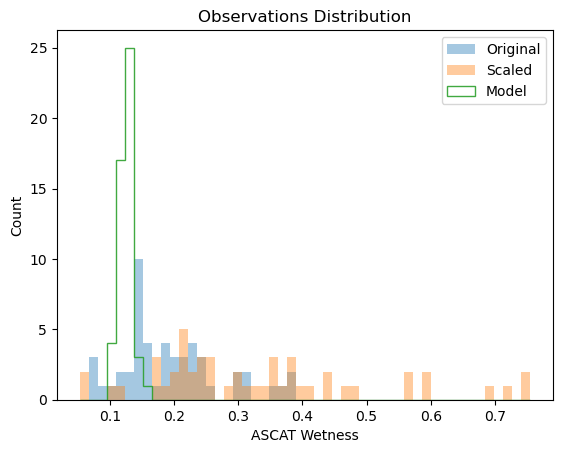

In [9]:
data1 = obs_obs[max_pair_indices]
data2 = tmp_obs[max_pair_indices]
data3 = obs_fcst[max_pair_indices]

# Define bin edges
combined_data = np.concatenate([data1, data2, data3])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Count')
ax.set_title('Observations Distribution')
ax.legend()

# savename = 'obs_dis_cnt.png'
# print(" Saving figure as", savename, "\n")
# plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()
